In [1]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
L = 30
p1=np.linspace(0.005,0.3,50)
Pinf=np.zeros(len(p1))
Pinf2=np.zeros(len(p1))
Fluct=np.zeros(len(p1))
Fluct2=np.zeros(len(p1))

navrg=50
for avrg in tqdm(range(navrg)):
    cont=0
    for p in p1:
        G = nx.grid_2d_graph(L, L, periodic=True)
        flip_random_fract_edges(G, p)
        adj = nx.adjacency_matrix(G).toarray()
        diabs = np.diag(np.abs(adj).sum(axis=1))
        slapl = diabs - adj
        eigv, eigV = np.linalg.eigh(slapl)
        eigV=np.transpose(eigV)
        Fluct[cont]=Fluct[cont]+np.abs(len(eigV[eigV[0]>0])-len(eigV[eigV[0]<0]))
        Fluct2[cont]=Fluct2[cont]+np.abs(len(eigV[eigV[0]>0])-len(eigV[eigV[0]<0]))*np.abs(len(eigV[eigV[0]>0])-len(eigV[eigV[0]<0]))
        Pinf[cont]=Pinf[cont]+np.min([len(eigV[eigV[0]>0]),len(eigV[eigV[0]<0])])/(L*L)
        Pinf2[cont]=Pinf2[cont]+(np.min([len(eigV[eigV[0]>0]),len(eigV[eigV[0]<0])])/(L*L))*(np.min([len(eigV[eigV[0]>0]),len(eigV[eigV[0]<0])])/(L*L))
        cont=cont+1
Pinf=Pinf/navrg
Fluct=Fluct/navrg
Fluct2=Fluct2/navrg
Pinf2=Pinf2/navrg

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [05:05<00:00,  6.11s/it]


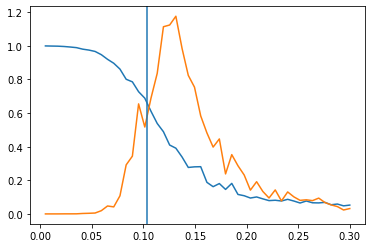

In [ ]:
#plt.plot(p1,Pinf)
N=L*L
plt.plot(p1,Fluct/(L*L))
#plt.plot(p1,L*(Pinf2-Pinf*Pinf))
plt.plot(p1,L*((Fluct2/(N*N))-(Fluct/N)*(Fluct/N)))
plt.axvline(x=0.103)

In [ ]:
from scipy.sparse.linalg import eigsh
import scipy as sp
import scipy.sparse  # call as sp.sparse

nodelist = list(G)
A = nx.to_scipy_sparse_array(G, nodelist=nodelist, format="csr")
n, m = A.shape
# TODO: rm csr_array wrapper when spdiags can produce arrays
D = sp.sparse.csr_array(sp.sparse.spdiags(A.sum(axis=1), 0, m, n, format="csr"))
slapl= D - A
slapl=slapl.asfptype()
w, eigV = eigsh(slapl, k=1)
print(len(eigV[eigV<0]))

450


In [ ]:
L = 30
p1=np.linspace(0.005,0.3,50)
Pinf=np.zeros(len(p1))
Pinf2=np.zeros(len(p1))
sigma =  config[a, b]
            neighbors = config[(a+1)%L, b] + config[a, (b+1)%L] + config[(a-1)%L, b] + config[a, (b-1)%L]
            del_E = 2*sigma*neighbors
            if del_E < 0:
                sigma *= -1
            elif rand() < np.exp(-del_E*beta):
                sigma *= -1
navrg=50
for avrg in tqdm(range(navrg)):
    cont=0
    for p in p1:
        G = nx.grid_2d_graph(L, L, periodic=True)
        flip_random_fract_edges(G, p)
        A = nx.to_scipy_sparse_array(G, nodelist=nodelist, format="csr")
        n, m = A.shape
        # TODO: rm csr_array wrapper when spdiags can produce arrays
        D = sp.sparse.cssigma =  config[a, b]
            neighbors = config[(a+1)%L, b] + config[a, (b+1)%L] + config[(a-1)%L, b] + config[a, (b-1)%L]
            del_E = 2*sigma*neighbors
            if del_E < 0:
                sigma *= -1
            elif rand() < np.exp(-del_E*beta):
                sigma *= -1r_array(sp.sparse.spdiags(A.sum(axis=1), 0, m, n, format="csr"))
        slapl= D - A
        slapl=slapl.asfptype()
        w, eigV = eigsh(slapl, k=1)
        Pinf[cont]=Pinf[cont]+np.min([len(eigV[eigV>0]),len(eigV[eigV<0])])/(L*L)
        Pinf2[cont]=Pinf2[cont]+(np.min([len(eigV[eigV>0]),len(eigV[eigV<0])])/(L*L))*(np.min([len(eigV[eigV>0]),len(eigV[eigV<0])])/(L*L))
        cont=cont+1
Pinf=Pinf/navrg
Pinf2=Pinf2/navrg

100%|███████████████████████████████████████████| 50/50 [00:29<00:00,  1.71it/s]


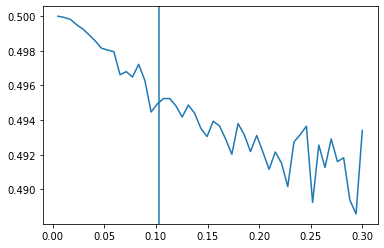

In [ ]:
plt.plot(p1,Pinf)
#plt.plot(p1,L*(Pinf2-Pinf*Pinf))
plt.axvline(x=0.103)

In [ ]:
import concurrent.futuresflip_random_fract_edges(G, p)


def process_item(item):
    # Perform operations on the item
    result = item * 2
    return result

my_list = [1, 2, 3, 4, 5]

with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = [executor.submit(process_item, item) for item in my_list]

    # Retrieve results as they become available
    for future in concurrent.futures.as_completed(futures):
        result = future.result()
        print(result)


2
6
4
8
10


In [ ]:
L = 16
p=0.15
G = nx.grid_2d_graph(L, L, periodic=True)
mapping = {old_label:new_label for new_label, old_label in enumerate(G.nodes())}
H = nx.relabel_nodes(G, mapping)
Hold = nx.relabel_nodes(G, mapping)

flip_random_fract_edges(H, p)
flip_random_fract_edges(Hold, p)
flip_random_fract_edges(G, p)


adj = nx.adjacency_matrix(H).toarray()
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj
eigv, eigV = np.linalg.eigh(slapl)
eigV=np.transpose(eigV)

In [ ]:
print(eigV[0])

[ 1.18522810e-02  1.62468392e-02  1.23261736e-02  6.99921645e-03
  3.93208243e-03  1.99781176e-03 -3.67569029e-03  2.41596946e-02
  4.00886402e-02  4.54378077e-02  3.99238772e-02  2.80041347e-02
  8.35218380e-03  1.29033287e-02  2.60018745e-02  2.13828924e-02
  6.86213122e-03  4.71466840e-03  3.77500489e-03  3.09667037e-03
  5.47049489e-03  7.67596060e-03  1.35773017e-02  2.80612093e-02
  3.76839681e-02  3.90994754e-02  3.36808006e-02  2.15141023e-02
  2.85664268e-03  2.21432218e-04  1.11311747e-02  1.22290230e-02
  5.47242067e-03  3.90610967e-03  2.79676393e-04  2.51440153e-03
  5.09699636e-03 -6.73928988e-03  1.70846752e-02  2.61530125e-02
  2.91564325e-02  2.47269343e-02  2.13779205e-02  1.33336451e-02
  3.04307801e-03  2.82964084e-04 -1.83950768e-03  4.88955267e-03
  4.15088699e-03  3.67229355e-03  1.63315352e-03  6.28109361e-04
  3.72555997e-03  5.46322816e-03  1.53722924e-02  2.03645045e-02
  1.69744735e-02  1.29023938e-04  5.64090170e-03 -2.32908305e-03
  2.55151599e-04  4.21152

In [ ]:
L = 32
p=0.25
G = nx.grid_2d_graph(L, L, periodic=True)
#mapping = {old_label:new_label for new_label, old_label in enumerate(G.nodes())}
#H = nx.relabel_nodes(G, mapping)
#Hold = nx.relabel_nodes(G, mapping)


# flip_random_fract_edges(G, p)
#flip_random_fract_edges(H, p)
#flip_random_fract_edges(Hold, p)

adj = nx.adjacency_matrix(G).toarray()
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj
eigv, eigV = np.linalg.eigh(slapl)
eigV=np.transpose(eigV)

#G = nx.grid_2d_graph(L, L, perioneg_weightsG =neg_weightsG = {((i, L//2), (i+1, L//2)): -1 for i in range(L-1)}
nx.set_edge_attributes(G, values=1, name='weight')
nx.set_edge_attributes(G, values=neg_weightsG, name='weight') {((L//2,L//2), (L//2,L//2+1)): -1}
# neg_weightsH = {(0, 10): -1}
fraction_to_flip = 0.07
#
G = nx.grid_2d_graph(L, L, periodic=True)
nx.set_edge_attributes(G, values=1, name='weight')
nx.set_edge_attributes(G, values=neg_weightsG, name='weight')dic=False)
mapping = {old_label:new_label for new_label, old_label in enumerate(G.nodes())}
H = nx.relabel_nodes(G, mapping)
labels=np.where(eigV[0]<0)[0]
Gneg = H.subgraph(labels)
nx.set_edge_attributes(Gneg, values=1,name='weight')
lista=['red' if i in labels else 'blue' for i in range(G.number_of_nodes())]
listaE=['red' if e[2]['weight']==-1 else 'black' for e in list(G.edges(data=True))]

nx.draw(Gneg,node_size=10)
Gcc = sorted(nx.connected_components(Gneg), key=len, reverse=True)
print(Gcc[0])
#nx.draw_spectral(H,node_size=20, node_color=lista, edge_color=listaE)

KeyError: 'weight'

[1 1 2 2 1 2 1 1 1 2 1 2 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2
 1 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 1 2 1
 2 2 2 1 1 2 2 2 1 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2
 2 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 2 2 2 1 2 2 1 2 2 1 1 1 1 1 1 2 2
 1 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 1 2 1 2 2 1 2 1 2 1 1 2 2 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 2 2 1 2 1 2 1 2 1 2 2 2 2 2 1 1 1 1 2 2
 2 1 1 2 2 1 2 1 2 1 2 2 2 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1]


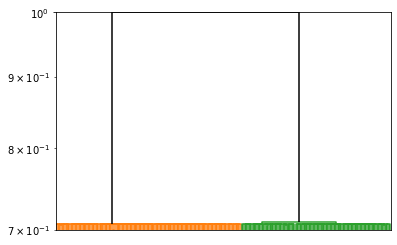

In [ ]:
tau=20
num=expm((-tau*slapl))
den=np.trace(num)
rho=num/den
#rho[rho<0]=1
Trho=np.copy(1.0/rho)#1/adj2
Trho = np.maximum(Trho, Trho.transpose() )
np.fill_diagonal(Trho, 0)


old_d = squareform(Trho)
dists = np.sqrt(1 - old_d/np.max(np.abs(old_d)))

linkage_matrix = linkage(dists, "complete")
labelList = [i+1 for i in range(0, len(G.nodes()))]
tmax=linkage_matrix[::, 2][-1]#+0.01*linkage_maneg_weightsG = {((i, L//2), (i+1, L//2)): -1 for i in range(L-1)}
nx.set_edge_attributes(G, values=1, name='weight')
nx.set_edge_attributes(G, values=neg_weightsG, name='weight')trix[::, 2][-1]
linkage_matrix = linkage(dists/tmax, "complete")
CM=fcluster(linkage_matrix, t=2, criterion='maxclust')
print(CM)
Th=8e-1
dendrogram(linkage_matrix,labels=None,no_labels=True,leaf_rotation=0,orientation='top',color_threshold=Th,above_threshold_color='k',leaf_font_size=10)
plt.yscale('log')
plt.ylim(7e-1,1)
plt.show()

In [5]:
%matplotlib inline
#
from os import chdir, getcwd
import random
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [6]:
lattice = Lattice2D(
    100, 'squared', pflip=0.2
)
lrgsg = SignedLaplacianAnalysis(lattice)
lattice.flip_random_fract_edges()
lattice.compute_k_eigvV(howmany=1)

In [7]:
nmax = 100#2*lrgsg.system.N
T = 0.4
extra_randinit = 5
initIS = 'spectrum_5'

def neigh_weight_magn(m, node_dict) -> list:
    return [w["weight"] * m[nn] for nn, w in node_dict.items()]

def calcEnergy(m, H=lattice.H):
    energy = 0
    for i in range(lattice.N):
        neigh=neigh_weight_magn(m, dict(H[i]))
        energy += m[i]*np.sum(neigh)
    return -energy/4.
def __uniform_init():
    return np.random.choice([-1,1], lattice.N)
def __eigv_init(i=0):
    return np.sign(lattice.eigV[i])

if initIS.startswith('spectrum'):
    states = int(initIS.split('_')[-1])
    tot_init = extra_randinit+states
    lattice.compute_k_eigvV(howmany=states)

bigene = []
bigmagn = []
# labels = np.where((eigV[0] < 0))[0]
for replica in range(states+extra_randinit):
    magn = []
    ene = []
    if initIS == 'ground_state': 
        m = __eigv_init()
    if initIS.startswith('spectrum'):
        if replica < states: m = __eigv_init(replica)
        else: m = __uniform_init()
    elif initIS == 'uniform': 
        m = __uniform_init()
    elif initIS == 'ground_state+uniform':
        if replica: m = __uniform_init()
        else: m = __eigv_init()
    elif initIS == 'all_states':
        if replica < lattice.N: m = __eigv_init(replica)
        else: m = __uniform_init()
    # sample = rd.sample(H.nodes, N)
    sample = random.sample(list(lattice.H.nodes()), lattice.N)
    for nsteps in tqdm(range(nmax)):
        magn.append(np.sum(m))
        ene.append(calcEnergy(m))
        for i in range(lattice.N):
            node=i
            m_new = -m[node]

            #Metropolis thing
            neigh=neigh_weight_magn(m, dict(lattice.H[i]))
            sumneigh = np.sum(np.sum(neigh))
            E_old=-m[node]*sumneigh
            E_new=-m_new*sumneigh

            if E_new<E_old:
                m[node]=m_new
            else:
                r=np.random.uniform(0, 1)
                if (r<np.exp(-(E_new-E_old)/T)):
                    m[node]=m_new
    bigmagn.append(m)
    bigene.append(ene)


100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


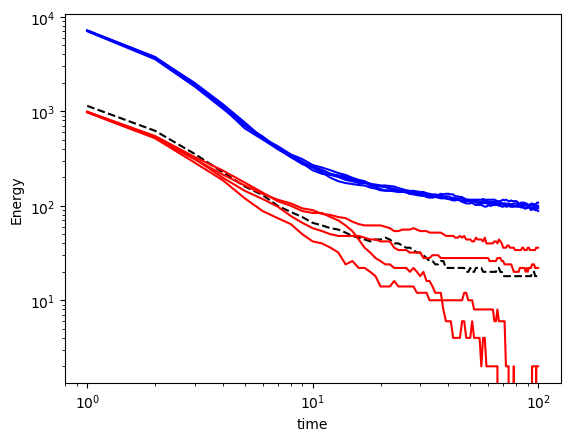

In [8]:
mine = np.array(bigene).flatten().min()
plt.plot(np.linspace(1, len(bigene[0]), num=len(bigene[0])), np.array(bigene[0])-mine, c='k', ls='--')
for i in range(1, tot_init):
    plt.plot(np.linspace(1, len(bigene[i]), num=len(bigene[i])), np.array(bigene[i])-mine, color='red' if i < states else 'blue')
plt.xscale('log')
plt.ylabel('Energy')
plt.xlabel('time')
# plt.ylim([1,1e3])
# plt.
plt.yscale('log')

Text(0.5, 1.0, '$v_{2}$')

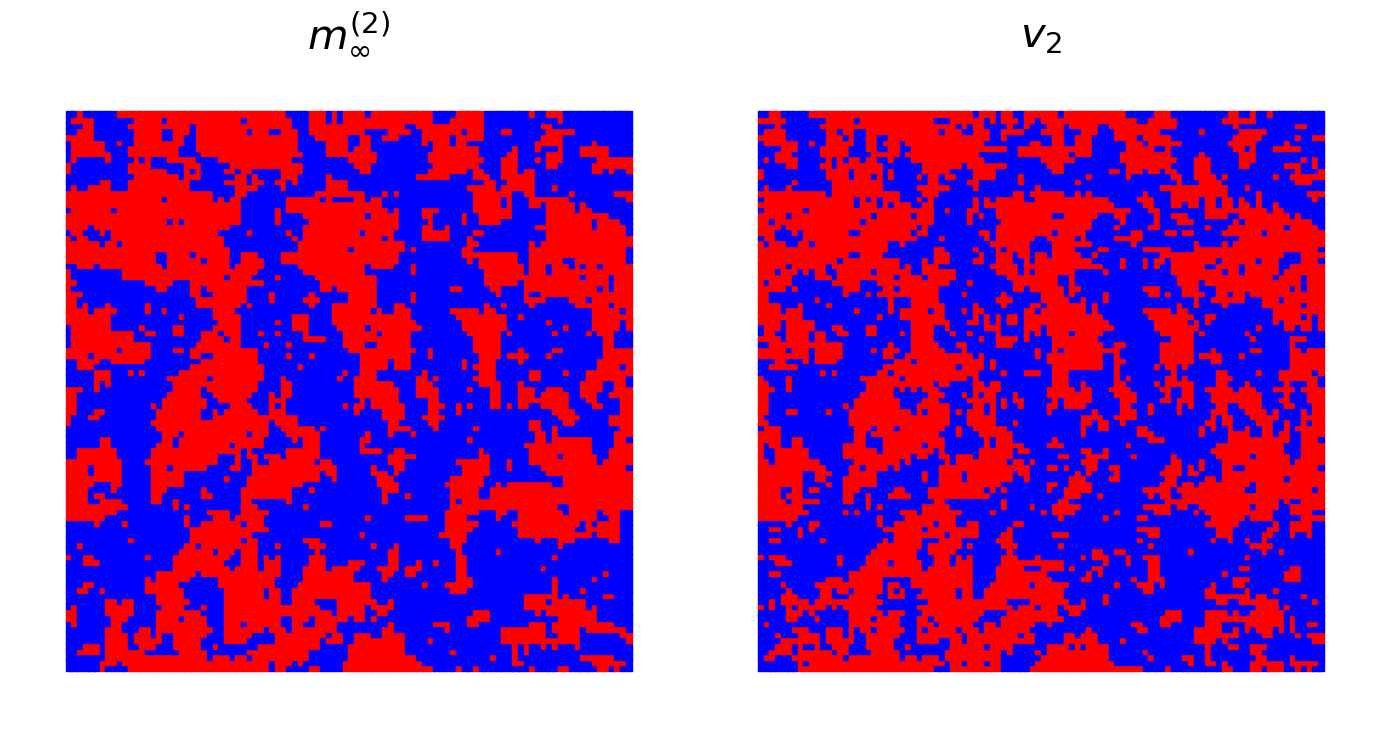

In [86]:
mapping = {old_label:new_label 
           for new_label, old_label in enumerate(lattice.G.nodes())}
Im=np.zeros((lattice.side1,lattice.side2))
for i1 in range(lattice.N):
    Node=list(mapping)[i1]
    if ((m[i1])==1): 
        Im[Node[1], Node[0]]=-1
    if ((m[i1])==-1): 
        Im[Node[1],Node[0]]=1

pos = dict(zip(lattice.H, lattice.G))

eigenN = 2
listam=['red' if i >0 else 'blue' for i in bigmagn[eigenN]]
listae=['red' if i >0 else 'blue' for i in lattice.bin_eigV(eigenN)]
from matplotlib import colors
# cmap = colors.ListedColormap(['darkblue', 'red'])
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(14, 7))
plt.subplots_adjust(wspace=None, top=0.5)
nx.draw(lattice.H, pos=pos, node_size=20, width=3, ax=ax, node_color=listam, node_shape="s")
nx.draw(lattice.H, pos=pos, node_size=20, width=3, ax=ax1, node_color=listae, node_shape="s")
# im = ax1.imshow(Im,interpolation=None,cmap=cmap, origin='lower')
# fig.colorbar(im, ax=ax1)
fig.tight_layout()
ax.set_title(fr"$m_{{\infty}}^{{({eigenN})}}$", fontdict={'size': 30})
ax1.set_title(fr"$v_{({eigenN})}$", fontdict={'size': 30})

In [15]:
#Generate network
L = 200
p = 0.2
G = nx.grid_2d_graph(L, L, periodic=True)
flip_random_fract_edges(G, p)
# neg_weightsG = {((i, j), (i, j+1)): -1 for i in range(L) for j in [L//3, L//2]}#strip
# neg_weightsG = {(i[0], i[1]): -1 for i in list(G.edges())[::2]}
# neg_weightsG = {((i, j), (i+1, j)): -1 for i in range(L) for j in range(L//2, L//2+4)}
# nx.set_edge_attributes(G, values=1, name='weight')
# nx.set_edge_attributes(G, values=neg_weightsG, name='weight')
#
N=G.number_of_nodes()

#
H = nx.convert_node_labels_to_integers(G)


In [16]:
adj = nx.adjacency_matrix(G).toarray()
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj
eigv, eigV = np.linalg.eigh(slapl)
eigV=np.transpose(eigV)

In [ ]:
labels=np.where((eigV[0] < 0))[0]
lista=['red' if i in labels else 'blue' for i in range(H.number_of_nodes())]
listaE=['red' if e[2]['weight']==-1 else 'blue' for e in list(H.edges(data=True))]
pos = dict((i, n) for i,n in enumerate(G.nodes()))

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import sys
import random as rd
import numpy as np
from tqdm import tqdm

#

nmax=2*N
T=0.2

def calcEnergy(m, H):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(N):
        neigh=[w['weight']*m[nn] for nn, w in dict(H[i]).items()]
        energy += -m[i]*np.sum(neigh)
    return energy/4.

#Initialize magnetization
labels=np.where((eigV[0] < 0))[0]
lista=['red' if i in labels else 'blue' for i in range(H.number_of_nodes())]
bigene = []
for replica in range(1):
    if replica != 0:
        m=[1 if i in labels else -1 for i in range(H.number_of_nodes())]
    else:
        m=np.zeros(N)
        for i in range(N):
            m[i]=rd.choice([-1,1])

    #Metropolis
    magn = []
    ene = []
    sample = rd.sample(H.nodes, N)
    for nsteps in tqdm(range(nmax)):
        magn.append(np.sum(m))
        ene.append(calcEnergy(m, H))
        for i in range(N):
            node=sample[i]
            m_new = -m[node]

            #Metropolis thing
            neigh=[w['weight']*m[nn] for nn, w in dict(H[node]).items()]
            E_old=-m[node]*np.sum(neigh)
            E_new=-m_new*np.sum(neigh)

            if E_new<E_old:
                m[node]=m_new
            else:
                r=rd.uniform(0, 1)
                if (r<np.exp(-(E_new-E_old)/T)):
                    m[node]=m_new
    bigene.append(ene)

/tmp/ipykernel_16160/1017649694.py:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample = rd.sample(H.nodes, N)
100%|██████████| 1800/1800 [00:27<00:00, 65.08it/s]


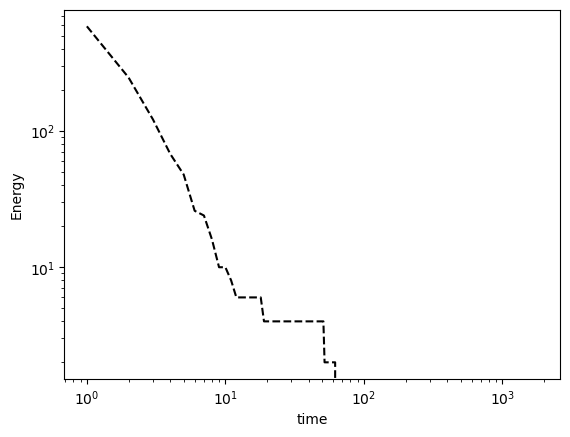

In [ ]:
# for i in range(19):
#     plt.plot(np.linspace(1, len(bigene[i]), num=len(bigene[i])), bigene[i]+ np.max(np.abs(bigene[-1])))
plt.plot(np.linspace(1, len(bigene[-1]), num=len(bigene[-1])), bigene[-1] + np.max(np.abs(bigene[-1])), c='k', ls='--')
plt.xscale('log')
plt.ylabel('Energy')
plt.xlabel('time')
# plt.ylim([1,1e3])
# 
plt.yscale('log')

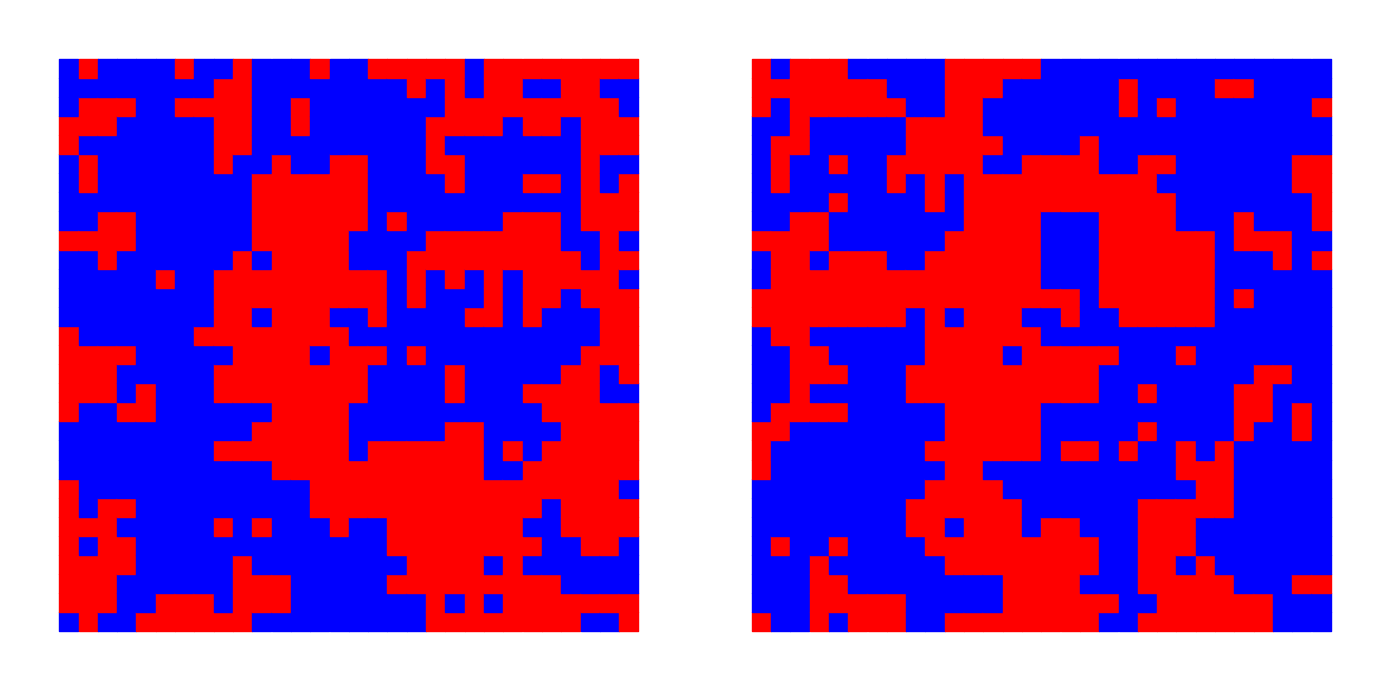

In [ ]:
mapping = {old_label:new_label 
           for new_label, old_label in enumerate(G.nodes())}
Im=np.zeros((L,L))
for i1 in range(N):
    Node=list(mapping)[i1]
    if ((m[i1])==1): 
        Im[Node[1], Node[0]]=-1
    if ((m[i1])==-1): 
        Im[Node[1],Node[0]]=1


listam=['red' if i >0 else 'blue' for i in m]

from matplotlib import colors
# cmap = colors.ListedColormap(['darkblue', 'red'])
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(14, 7))
plt.subplots_adjust(wspace=None)
nx.draw(H, pos=pos, node_size=190, width=3, ax=ax, node_color=lista, node_shape="s", edge_color=listaE)
nx.draw(H, pos=pos, node_size=190, width=3, ax=ax1, node_color=listam, node_shape="s", edge_color=listaE)
# im = ax1.imshow(Im,interpolation=None,cmap=cmap, origin='lower')
# fig.colorbar(im, ax=ax1)
fig.tight_layout()

In [75]:
autolap = np.array(lista) == 'red'
autonag = np.array(listam) == 'red'
sum(~(autolap ^ autonag))/len(autolap)

0.8322222222222222